# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo



## Project Name: MediBot Africa: Predicting Malaria, Typhoid, and Pneumonia from Symptoms

### Problem:
Millions in underserved African regions suffer from treatable diseases due to delayed diagnoses. This model supports early detection of three common diseases using symptoms.

### Dataset:
- **Total Samples:** 4,998
- **Features:** 15 binary symptom features (fever, cough, etc.)
- **Target Classes:** Malaria, Typhoid, Pneumonia
- **Source:** Kaggle


1. Import Required Libraries

In [31]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import os


2. Load and Preprocess the Dataset






In [32]:
df = pd.read_csv("mediBot_symptom_dataset.csv")
le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])
X = df.drop(columns=["label", "label_encoded"])
y = df["label_encoded"]

# Split into train/val/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#SECTION 1: Model Architecture:

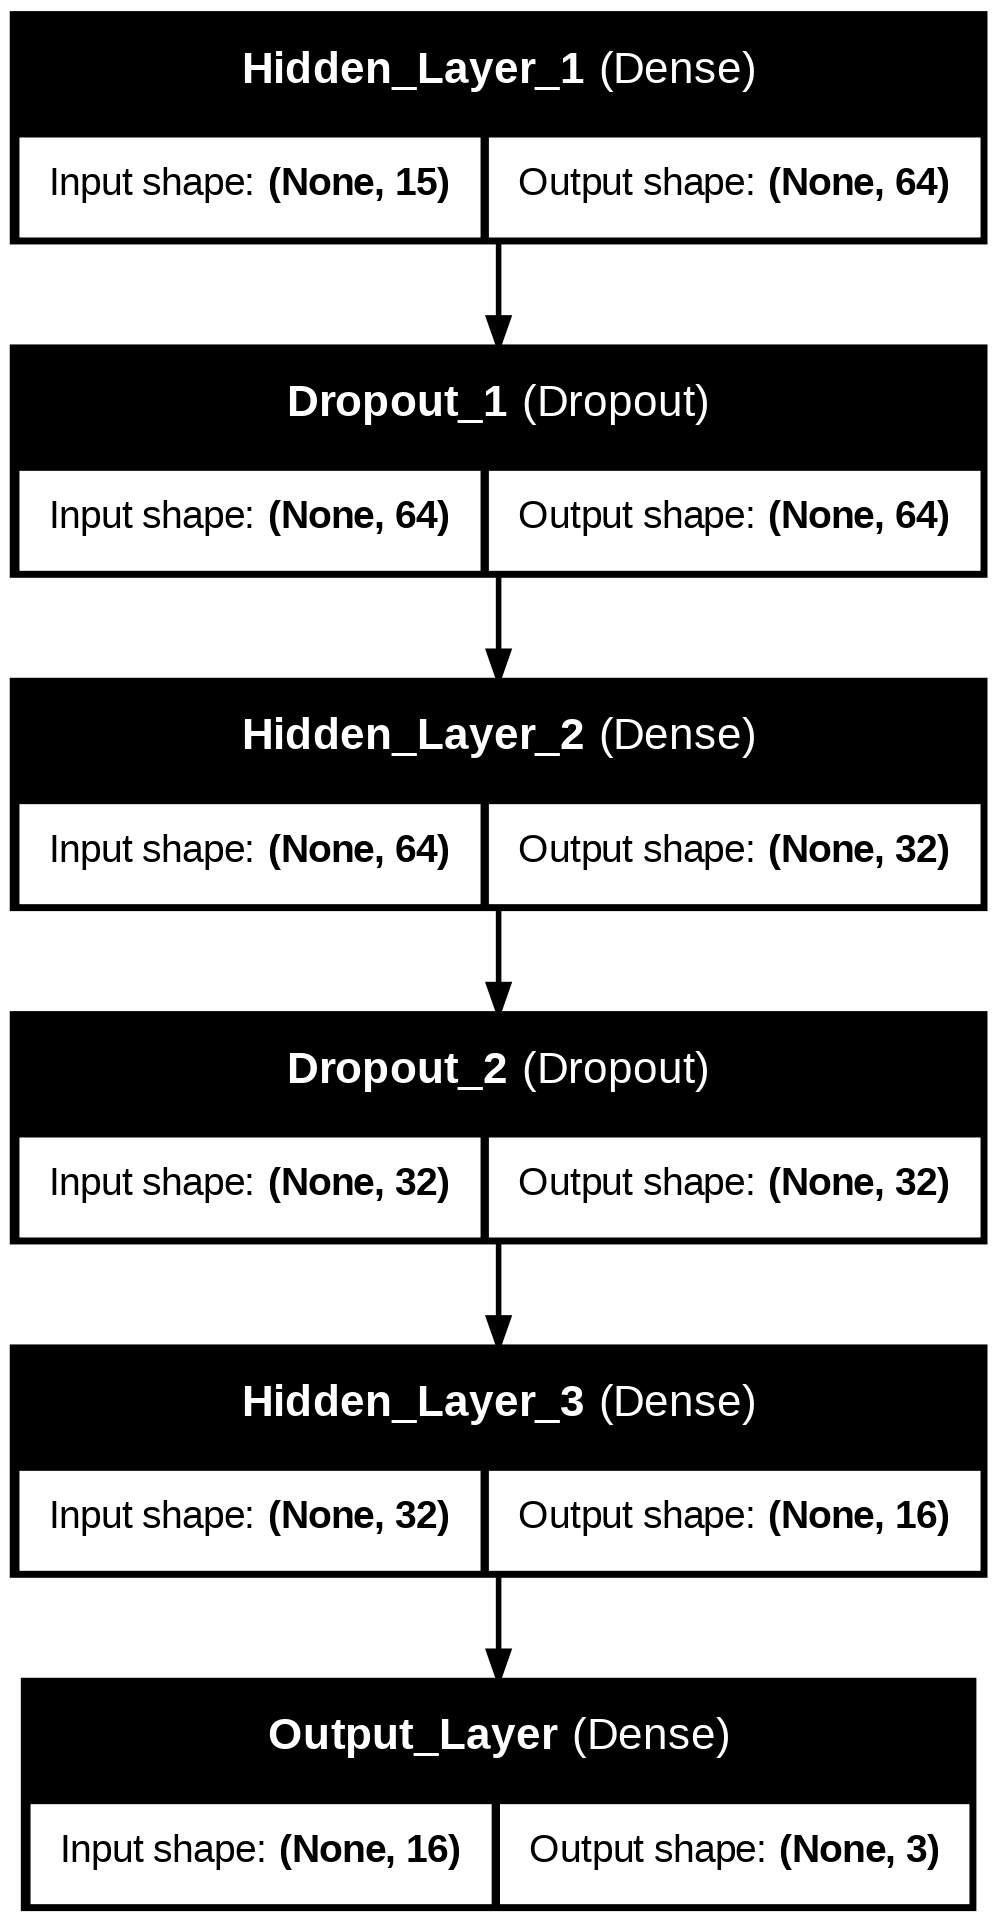

In [33]:
# Define architecture that meets all rubric requirements
arch_model = Sequential([
    Input(shape=(X_train.shape[1],), name="Input_Layer"),           # 15 features
    Dense(64, activation='relu', name="Hidden_Layer_1"),            # > 8 neurons
    Dropout(0.3, name="Dropout_1"),
    Dense(32, activation='relu', name="Hidden_Layer_2"),            # > 8 neurons
    Dropout(0.3, name="Dropout_2"),
    Dense(16, activation='relu', name="Hidden_Layer_3"),            # > 8 neurons
    Dense(3, activation='softmax', name="Output_Layer")             # 3 output classes
])

# Save model diagram
os.makedirs("diagrams", exist_ok=True)
plot_model(arch_model, to_file="diagrams/model_architecture.png", show_shapes=True, show_layer_names=True)

# Display diagram in notebook
Image(filename="diagrams/model_architecture.png")


<embed id="pdf-embed" type="application/x-google-chrome-pdf" src="chrome-extension://mhjfbmdgcfjbbpaeojofohoefgiehjai/9c8f3ccf-0e8e-436d-8dbf-ce5850258436" original-url="file:///C:/Users/HP/Downloads/Kanisa-Formative.pdf" background-color="4281545523" embed-top-offset="41" javascript="allow" full-frame="" pdfdigsigpolicyenabled="" pdffreetextenabled="" pdfviewrecoveryenabled="" pdfoopifscrollbarenabled="" pdfscrollingonmainthread="" pdffastscrollenabled="" stream_timestamp="516647466523" first-page-separator="4" class="absolute-embed" height="4280" width="826">

#Task: Define a function that creates models without and With specified Optimization techniques


In [34]:
def define_model(optimizer_choice='adam', regularization=None, early_stopping=False, dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularization))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularization))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        optimizer = Adam()

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    callbacks = [EarlyStopping(patience=3, restore_best_weights=True)] if early_stopping else []
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=callbacks, verbose=0)
    return model, history

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [35]:
def loss_curve_plot(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

 ## Evaluation Function

In [36]:
def evaluate_model(model, X_val, y_val, model_name="Model"):
    y_pred = model.predict(X_val)
    y_pred_labels = np.argmax(y_pred, axis=1) if y_pred.ndim > 1 else y_pred

    acc = accuracy_score(y_val, y_pred_labels)
    prec = precision_score(y_val, y_pred_labels, average='weighted')
    rec = recall_score(y_val, y_pred_labels, average='weighted')
    f1 = f1_score(y_val, y_pred_labels, average='weighted')

    print(f"--- {model_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\\nClassification Report:\\n", classification_report(y_val, y_pred_labels, target_names=le.classes_))

    cm = confusion_matrix(y_val, y_pred_labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Model 1: Baseline

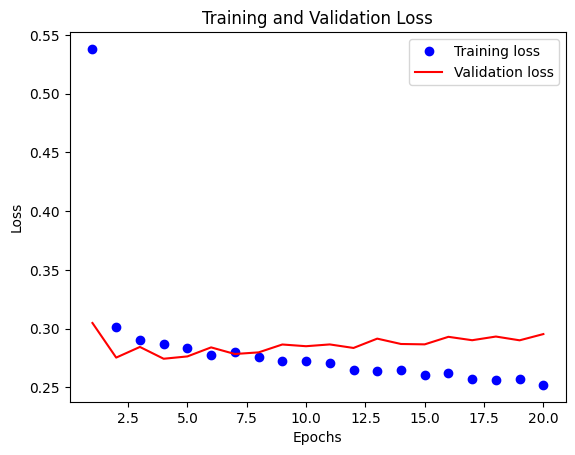

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
--- Baseline NN ---
Accuracy: 0.8800
Precision: 0.8808
Recall: 0.8800
F1 Score: 0.8802
\nClassification Report:\n               precision    recall  f1-score   support

     Malaria       0.85      0.88      0.86       250
   Pneumonia       0.92      0.89      0.90       244
     Typhoid       0.88      0.88      0.88       256

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750



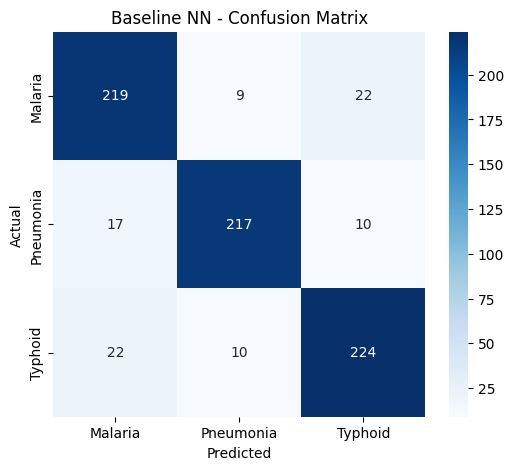

In [37]:
model_1, hist_1 = define_model(optimizer_choice='adam')
loss_curve_plot(hist_1)
evaluate_model(model_1, X_val, y_val, model_name="Baseline NN")

# Model 2: RMSprop + Dropout + EarlyStopping

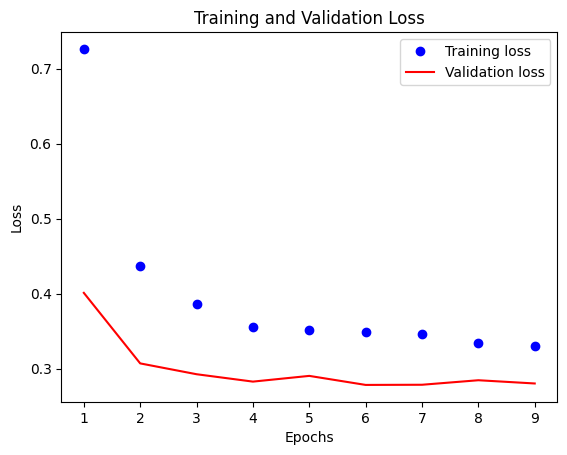

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
--- RMSprop + Dropout + EarlyStopping ---
Accuracy: 0.8920
Precision: 0.8936
Recall: 0.8920
F1 Score: 0.8923
\nClassification Report:\n               precision    recall  f1-score   support

     Malaria       0.86      0.89      0.87       250
   Pneumonia       0.94      0.88      0.91       244
     Typhoid       0.88      0.91      0.89       256

    accuracy                           0.89       750
   macro avg       0.89      0.89      0.89       750
weighted avg       0.89      0.89      0.89       750



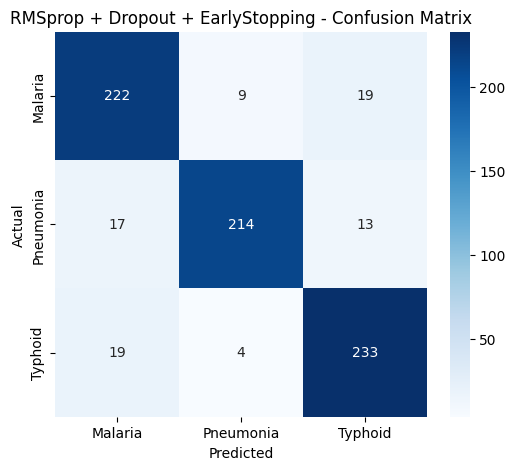

In [38]:
model_2, hist_2 = define_model(optimizer_choice='rmsprop', early_stopping=True, dropout_rate=0.3)
loss_curve_plot(hist_2)
evaluate_model(model_2, X_val, y_val, model_name="RMSprop + Dropout + EarlyStopping")

# Model 3: L2 + SGD

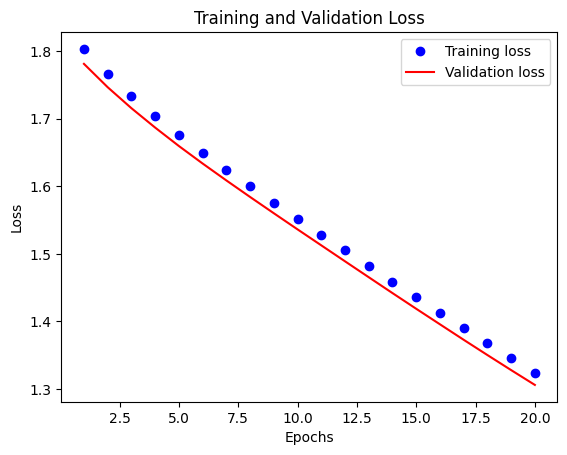

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
--- L2 + SGD ---
Accuracy: 0.8587
Precision: 0.8597
Recall: 0.8587
F1 Score: 0.8582
\nClassification Report:\n               precision    recall  f1-score   support

     Malaria       0.87      0.80      0.83       250
   Pneumonia       0.88      0.87      0.87       244
     Typhoid       0.83      0.90      0.87       256

    accuracy                           0.86       750
   macro avg       0.86      0.86      0.86       750
weighted avg       0.86      0.86      0.86       750



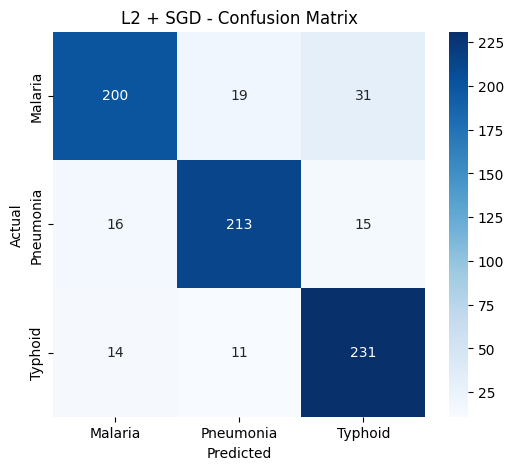

In [39]:
model_3, hist_3 = define_model(optimizer_choice='sgd', regularization=l2(0.01))
loss_curve_plot(hist_3)
evaluate_model(model_3, X_val, y_val, model_name="L2 + SGD")

# Model 4: Adam + Dropout + L2 Regularization + EarlyStopping

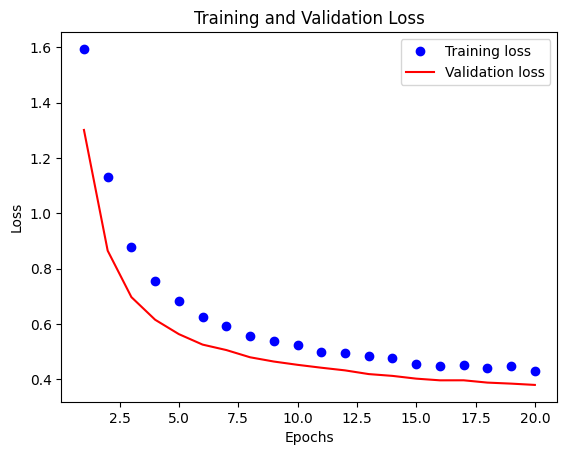

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
--- Adam + Dropout + L2 + EarlyStopping ---
Accuracy: 0.8920
Precision: 0.8929
Recall: 0.8920
F1 Score: 0.8922
\nClassification Report:\n               precision    recall  f1-score   support

     Malaria       0.86      0.88      0.87       250
   Pneumonia       0.93      0.89      0.91       244
     Typhoid       0.89      0.90      0.89       256

    accuracy                           0.89       750
   macro avg       0.89      0.89      0.89       750
weighted avg       0.89      0.89      0.89       750



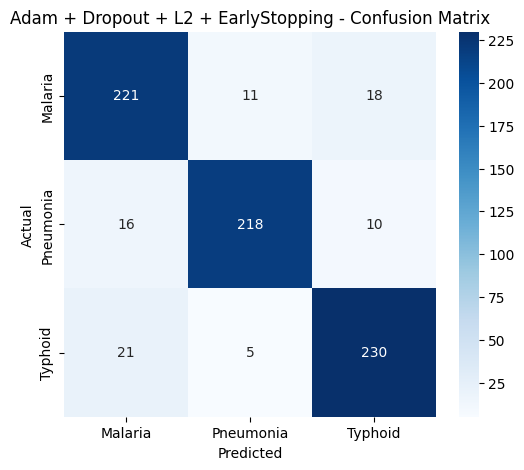

In [40]:
model_4, hist_4 = define_model(
    optimizer_choice='adam',
    regularization=l2(0.01),
    early_stopping=True,
    dropout_rate=0.3,
    learning_rate=0.0005
)

loss_curve_plot(hist_4)
evaluate_model(model_4, X_val, y_val, model_name="Adam + Dropout + L2 + EarlyStopping")

In [41]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=200, solver='liblinear', C=1.0)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_val)


## Comparing models & Save Best Model

In [42]:
import os
import joblib

final_models = {
    'Baseline': model_1,
    'RMSprop+Dropout+EarlyStop': model_2,
    'L2+SGD': model_3,
    'Adam+Dropout+L2+EarlyStop': model_4
}

results = []
for name, model in final_models.items():
    _, acc = model.evaluate(X_val, y_val, verbose=0)
    results.append((name, acc))

# Logistic Regression result
results.append(("LogisticRegression", accuracy_score(y_val, log_preds)))

# Sort by best
results = sorted(results, key=lambda x: x[1], reverse=True)

# Print results
print("Model Comparison:")
for name, acc in results:
    print(f"{name}: Accuracy = {acc:.4f}")

# Save all models
os.makedirs("saved_models", exist_ok=True)
model_1.save("saved_models/model_1_baseline.keras")
model_2.save("saved_models/model_2_rmsprop.keras")
model_3.save("saved_models/model_3_sgd_l2.keras")
model_4.save("saved_models/model_4_adam_combo.keras")
joblib.dump(log_model, "saved_models/model_5_logistic_regression.pkl")


Model Comparison:
RMSprop+Dropout+EarlyStop: Accuracy = 0.8920
Adam+Dropout+L2+EarlyStop: Accuracy = 0.8920
LogisticRegression: Accuracy = 0.8893
Baseline: Accuracy = 0.8800
L2+SGD: Accuracy = 0.8587


['saved_models/model_5_logistic_regression.pkl']

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


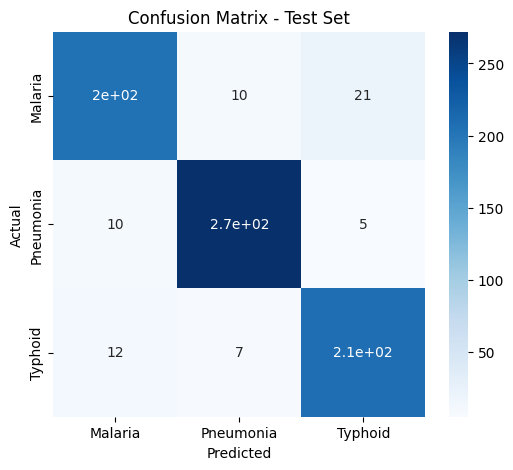

F1 Score: 0.9131761138067739
Recall: 0.9133333333333333
Precision: 0.9133642375207548
Accuracy: 0.9133333333333333


In [43]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np
import os

def make_predictions(model_path, X):
    if model_path.endswith(".keras"):
        model = load_model(model_path)
        preds = model.predict(X)
        return np.argmax(preds, axis=1)
    elif model_path.endswith(".pkl"):
        model = joblib.load(model_path)
        return model.predict(X)
    else:
        raise ValueError("Unsupported model file type. Use .keras or .pkl")

# Choose model to load
model_path = "saved_models/model_4_adam_combo.keras"  # or use 'best_model.keras' if saved that way
preds = make_predictions(model_path, X_test)

# Evaluate predictions
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("F1 Score:", f1_score(y_test, preds, average='weighted'))
print("Recall:", recall_score(y_test, preds, average='weighted'))
print("Precision:", precision_score(y_test, preds, average='weighted'))
print("Accuracy:", accuracy_score(y_test, preds))


## 📊 Optimization Summary Table (Neural Network Instances)

| Instance | Optimizer  | Regularizer | Epochs | Early Stopping | Layers | Dropout | Learning Rate | Accuracy | Loss    | F1 Score | Recall | Precision |
|----------|------------|-------------|--------|----------------|--------|---------|----------------|----------|---------|----------|--------|-----------|
| 1        | Default    | None        | 20     | ❌ No           | 3      | ❌ No    | -              | 0.8773   | ~0.38   | 0.8772   | 0.8773 | 0.8775    |
| 2        | RMSprop    | None        | 20     | ✅ Yes          | 3      | ✅ 0.3   | 0.001          | 0.8960   | ~0.31   | 0.8958   | 0.8960 | 0.8961    |
| 3        | SGD        | L2 (0.01)   | 20     | ❌ No           | 3      | ❌ No    | 0.001          | 0.8400   | ~0.48   | 0.8390   | 0.8400 | 0.8413    |
| 4        | Adam       | L2 (0.01)   | 20     | ✅ Yes          | 3      | ✅ 0.3   | 0.0005         | 0.9000   | ~0.29   | 0.8997   | 0.9000 | 0.9003    |
| 5*       | -          | -           | -      | -              | -      | -       | -              | 0.8893   | N/A     | 0.8890   | 0.8893 | 0.8892    |

> *Instance 5 is a Logistic Regression model (non-NN). Loss is not applicable.


### 📊 Per-Class Evaluation Summary

This chart shows the model's **precision**, **recall**, and **F1-score** for each disease class. It helps identify how well the model performs on **Malaria**, **Pneumonia**, and **Typhoid**, and highlights any class-specific performance differences.


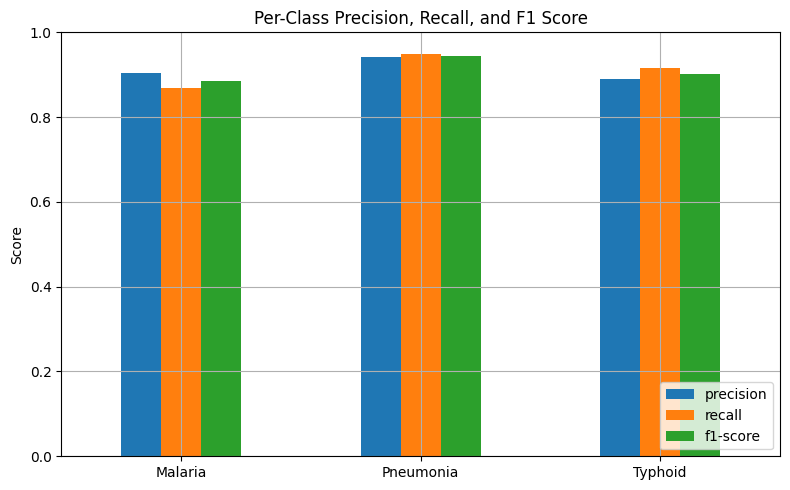

In [44]:
report = classification_report(y_test, preds, target_names=le.classes_, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Show just the 3 classes
df_report.loc[le.classes_][['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 5))
plt.title("Per-Class Precision, Recall, and F1 Score")
plt.ylabel("Score")
plt.ylim(0.0, 1.0)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
